# A mechanism for chargining neurons
The question of much of how long the cue has to be sustained in order for the sequence to get boostrap is answered on this notebook

In [1]:
import sys
sys.path.append('../')
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from mpl_toolkits.axes_grid1 import make_axes_locatable

%matplotlib inline

plt.rcParams["figure.figsize"] = [16,9]
sns.set(font_scale=3.0)

from network import run_network_recall, train_network, run_network_recall_limit
from connectivity import designed_matrix_sequences, designed_matrix_sequences_local
from analysis import get_recall_duration_for_pattern, get_recall_duration_sequence

## The equation and two examples

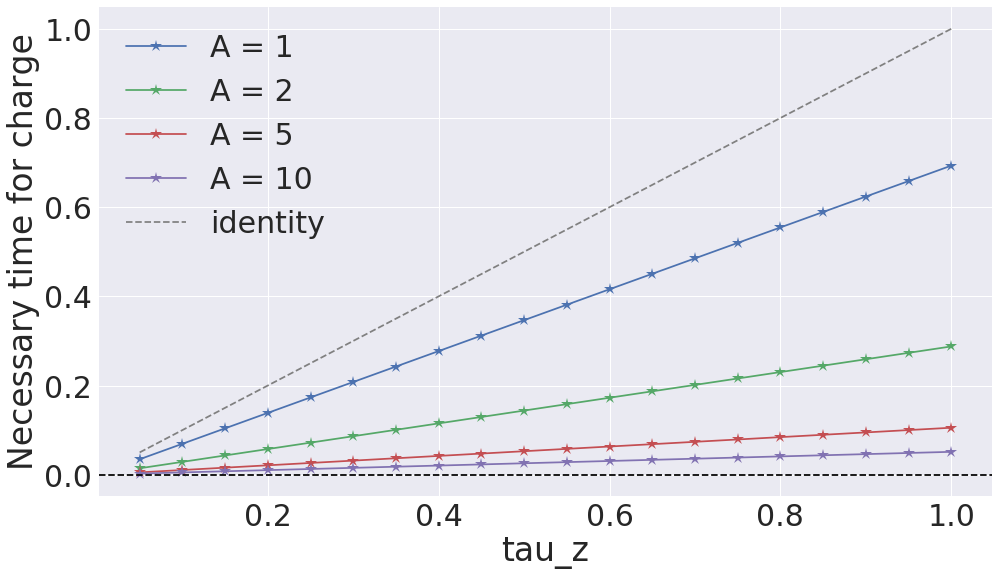

In [19]:
A_list = [1, 2, 5, 10]
threshold = 0.5
tau_z = 0.050

tau_z_vector = np.arange(0.050, 1.050, 0.050)
for A in A_list:
    T_charge = tau_z_vector * np.log(A / (A - threshold))
    plt.plot(tau_z_vector, T_charge, '*-', markersize=13, label='A = ' + str(A))

plt.plot(tau_z_vector, tau_z_vector, ls='--', color='gray', label='identity')
plt.xlabel('tau_z')
plt.ylabel('Necessary time for charge')

plt.legend()
plt.axhline(0, ls='--', color='black');

The fact that the identity goes over all the lines means that a tau_z time for the cue will be enough for all the sequeces to kick-start themselves if we maake T_cue = tau_z

#### Two examples
The first example does not work because the self-excitation value is too smal the second one corrects for that and succesfully works

duration nan


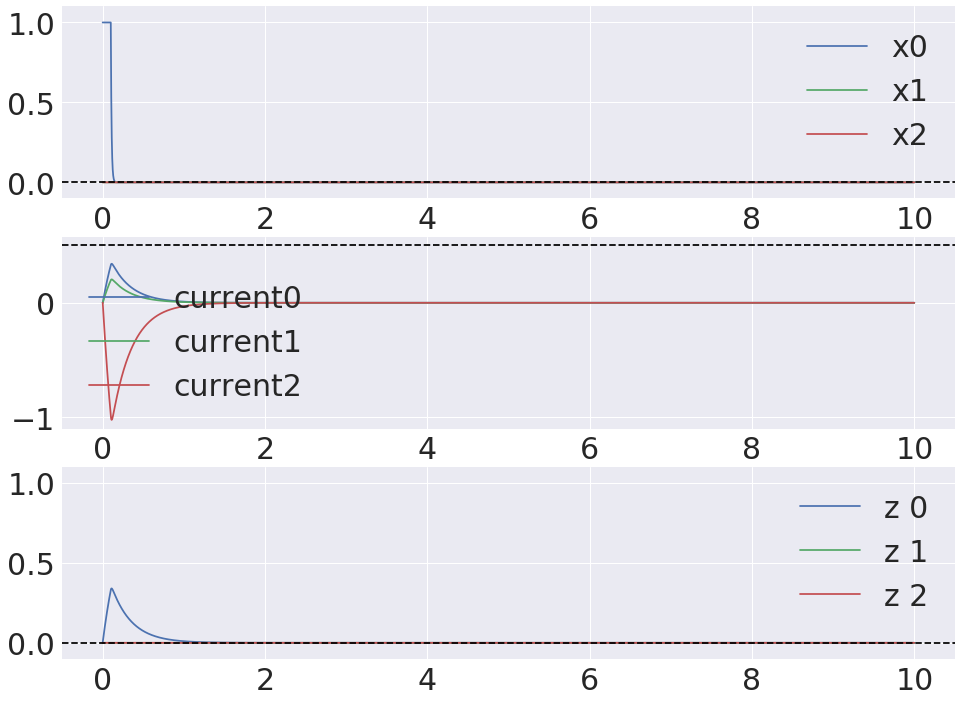

In [17]:
N = 10
sequences = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
self_excitation = 1
transition = 0.6
inhibition = 3.0

G = 200.0
tau_m = 0.010
T = 10.0
I_cue = 0
T_cue = 0.100
dt = 0.001

threshold = 0.5
tau_z = 0.250

w = designed_matrix_sequences(N, sequences, self_excitation=self_excitation, transition=transition, 
                              inhbition=inhibition)


dic = run_network_recall(N, w, G, threshold, tau_m, tau_z,  T, dt, I_cue, T_cue)

pattern = 2
x_history = dic['x']
duration = get_recall_duration_for_pattern(x_history, pattern, dt)
print('duration', duration)

time = np.arange(0, T, dt)
x_history = dic['x']
z_history = dic['z']
current_history = dic['current']

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

patterns = [0, 1, 2]
# patterns = sequence
for pattern in patterns:
    ax1.plot(time, x_history[:, pattern], label='x' + str(pattern))
    ax2.plot(time, current_history[:, pattern], label='current' + str(pattern))
    ax3.plot(time, z_history[:, pattern], label='z ' + str(pattern))
    
ax1.axhline(0, ls='--', color='black')
ax1.legend();
ax1.set_ylim([-0.1, 1.1])
ax3.set_ylim([-0.1, 1.1])

ax2.axhline(threshold, ls='--', color='black')
ax2.legend();

ax3.axhline(0, ls='--', color='black')
ax3.legend();

This does not converge, is in the area of A=1 where the current is not long enough. 

../network.py:5: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-G * x))


duration 1.217


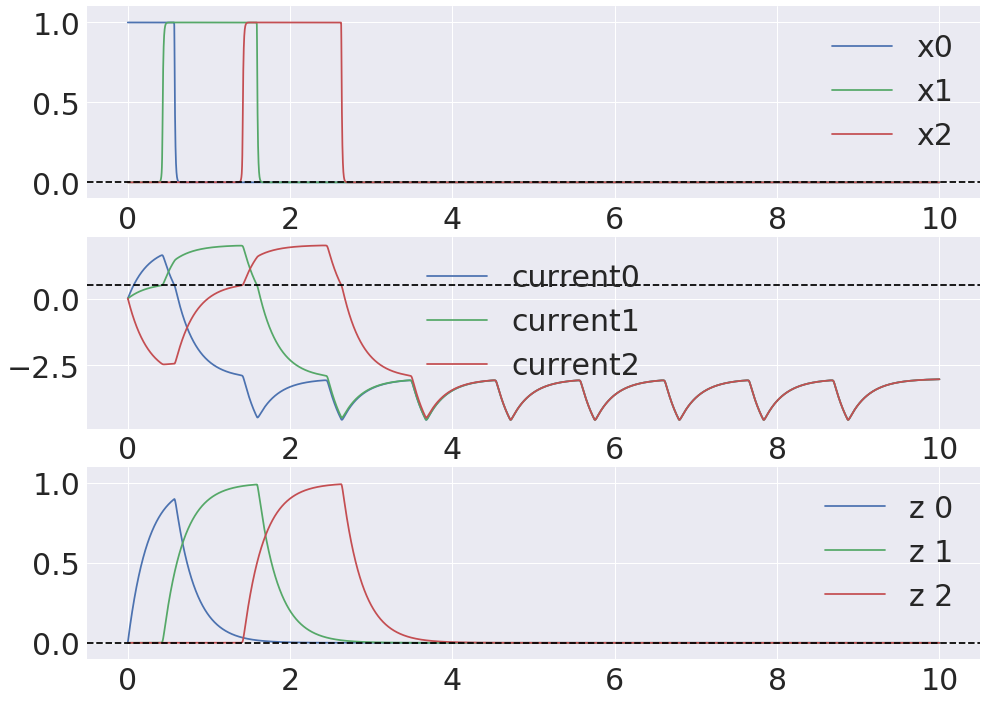

In [18]:
N = 10
sequences = [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]
self_excitation = 2
transition = 0.6
inhibition = 3.0

G = 200.0
tau_m = 0.010
T = 10.0
I_cue = 0
T_cue = 0.100
dt = 0.001

threshold = 0.5
tau_z = 0.250

w = designed_matrix_sequences(N, sequences, self_excitation=self_excitation, transition=transition, 
                              inhbition=inhibition)


dic = run_network_recall(N, w, G, threshold, tau_m, tau_z,  T, dt, I_cue, T_cue)

pattern = 2
x_history = dic['x']
duration = get_recall_duration_for_pattern(x_history, pattern, dt)
print('duration', duration)

time = np.arange(0, T, dt)
x_history = dic['x']
z_history = dic['z']
current_history = dic['current']

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

patterns = [0, 1, 2]
# patterns = sequence
for pattern in patterns:
    ax1.plot(time, x_history[:, pattern], label='x' + str(pattern))
    ax2.plot(time, current_history[:, pattern], label='current' + str(pattern))
    ax3.plot(time, z_history[:, pattern], label='z ' + str(pattern))
    
ax1.axhline(0, ls='--', color='black')
ax1.legend();
ax1.set_ylim([-0.1, 1.1])
ax3.set_ylim([-0.1, 1.1])

ax2.axhline(threshold, ls='--', color='black')
ax2.legend();

ax3.axhline(0, ls='--', color='black')
ax3.legend();